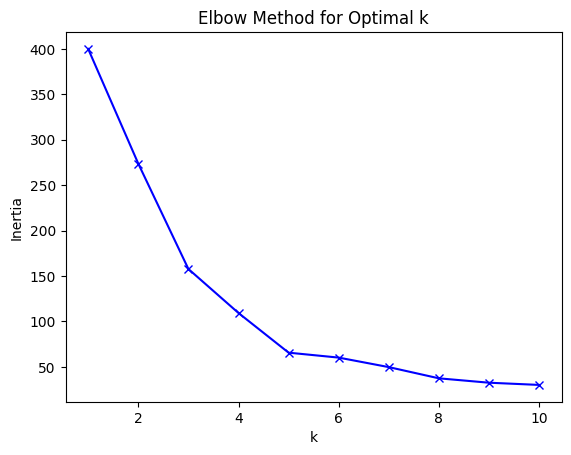

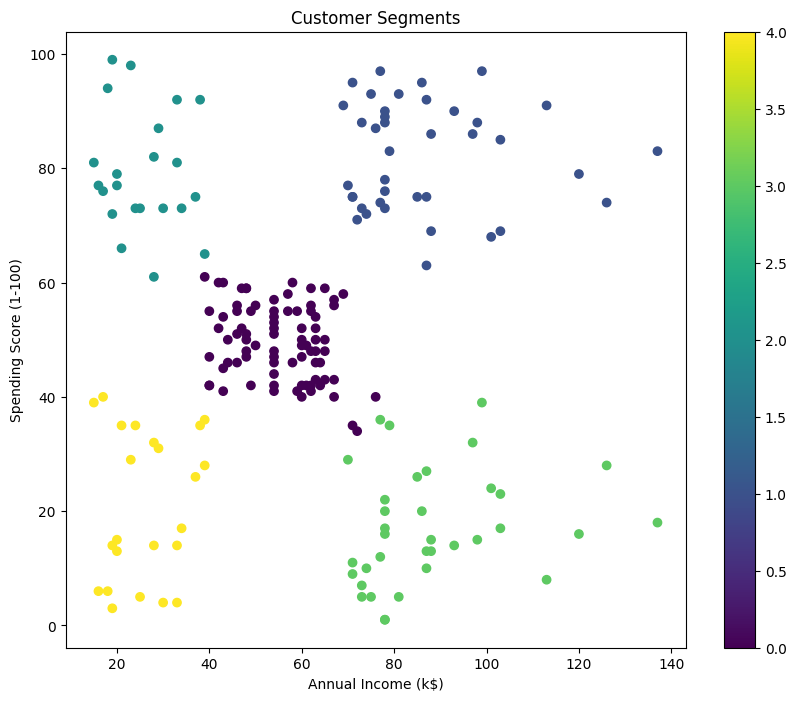


Cluster 0:
       Annual Income (k$)  Spending Score (1-100)  Cluster
count           81.000000               81.000000     81.0
mean            55.296296               49.518519      0.0
std              8.988109                6.530909      0.0
min             39.000000               34.000000      0.0
25%             48.000000               44.000000      0.0
50%             54.000000               50.000000      0.0
75%             62.000000               55.000000      0.0
max             76.000000               61.000000      0.0

Cluster 1:
       Annual Income (k$)  Spending Score (1-100)  Cluster
count           39.000000               39.000000     39.0
mean            86.538462               82.128205      1.0
std             16.312485                9.364489      0.0
min             69.000000               63.000000      1.0
25%             75.500000               74.500000      1.0
50%             79.000000               83.000000      1.0
75%             95.000000       

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
# Assuming you've downloaded the dataset and it's in a CSV file named 'customer_data.csv'
df = pd.read_csv(r'C:\Users\Methuna\Downloads\archive\Mall_Customers.csv')

# Step 2: Select relevant features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Determine the optimal number of clusters using the elbow method
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 5: Apply K-means clustering with the optimal number of clusters
# Let's assume the optimal k is 5 (you should determine this from the elbow plot)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.colorbar(scatter)
plt.show()

# Step 7: Analyze the clusters
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data[features + ['Cluster']].describe())